# Hypergrams
Here's some code to make interactive figures with plotly express. These aren't really relevant to OpenSpace (unless you want to open them in an embedded browser window) but they might come in handy if you want a lightweight interactive visualization that you can stick into a webpage or email to somebody.

In [1]:
import plotly.express as px

from datetime import datetime as dt
import pandas as pd
import openspace_rvdata.r2r2df as r2r
import openspace_rvdata.geocsv2geojson as g2g

import logging
logger = logging.getLogger(__name__)

## Gantt Chart

In [18]:
url

'https://service.rvdata.us/api/cruise/vessel/Palmer'

In [16]:
mdf.columns

Index(['cruise_id', 'cruise_name', 'cruise_type', 'cruise_url', 'cruise_doi',
       'is_registered', 'vessel_ices_code', 'vessel_id', 'vessel_name',
       'vessel_shortname', 'operator_id', 'operator_name', 'scheduler_id',
       'waterbody_id', 'waterbody_name', 'depart_date', 'depart_port_id',
       'depart_port_name', 'depart_port_fullname', 'arrive_date',
       'arrive_port_id', 'arrive_port_name', 'arrive_port_fullname',
       'chief_scientist', 'has_r2rnav', 'release_person_id',
       'release_person_id_sent', 'release_date', 'release_date_sent',
       'release_sent', 'release_option', 'is_ingmrt', 'is_blanket_release',
       'vessel_acronym', 'longitude_min', 'longitude_max', 'latitude_min',
       'latitude_max', 'cruise_reports', 'redirect_to_mgds', 'keyword_list'],
      dtype='object')

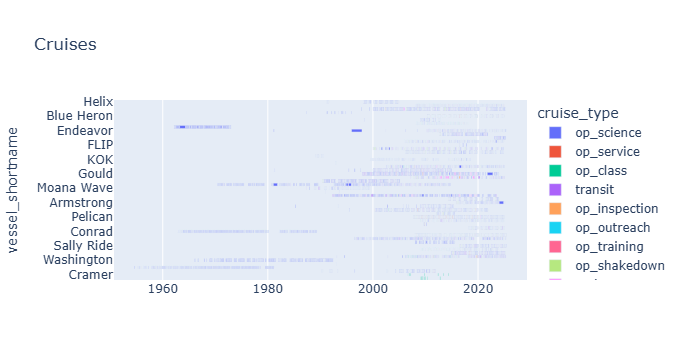

In [22]:
# mdf[mdf.has_r2rnav == False].is_retrieved
import plotly.express as px
title = "Cruises"

# url = r2r.get_r2r_url(vessel_name = "Palmer")
url = "https://service.rvdata.us/api/cruise/"
mdf = r2r.get_cruise_metadata(url)

fig = px.timeline(
    mdf,
    x_start="depart_date",
    x_end="arrive_date",
    y="vessel_shortname",  # This will be the label for each bar on the y-axis
    color="cruise_type", # You can color by the same ID or another categorical column
    title=title,
    # Other optional arguments:
    hover_name="cruise_id", # Show more info on hover
    # text="label_on_bar", # Text directly on the bar
    # facet_row="some_category", # For breaking down by a category
    # template="plotly_white" # or "plotly_dark", "ggplot2", "seaborn", etc.
)

# You might want to sort the y-axis (tasks) for better readability
fig.update_yaxes(autorange="reversed") # To display the first task at the top

fig.show()
fig.write_html("plots/RV Cruises.html")